In [ ]:
#Predicting Boston Housing Prices- Linear Regression Model
#The file BostonHousing.csv contains information collected by the US
#Bureau of the Census concerning housing in the area of Boston, Massachusetts. The dataset includes information on 506 census
#housing tracts in the Boston area. The goal is to predict the median house price in new tracts based on information such as
#crime rate, pollution, and number of rooms. The dataset contains 13 predictors, and the outcome variable is the median house price
#(MEDV).

In [27]:
## Import required packages
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import sklearn

In [28]:
df = pd.read_csv('BostonHousing.csv')
df.dtypes

CRIM         float64
ZN           float64
INDUS        float64
CHAS           int64
NOX          float64
RM           float64
AGE          float64
DIS          float64
RAD            int64
TAX            int64
PTRATIO      float64
LSTAT        float64
MEDV         float64
CAT. MEDV      int64
dtype: object

In [29]:
df.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
LSTAT        0
MEDV         0
CAT. MEDV    0
dtype: int64

In [30]:
# PART- B: Fit a multiple linear regression model to the median house
price (MEDV) as a function of CRIM, CHAS, and RM
predictors = ['CRIM', 'CHAS', 'RM']
outcome = 'MEDV'
X = pd.get_dummies(df[predictors], drop_first=True)
y = df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

house_lm = LinearRegression()
house_lm.fit(train_X, train_y)
print('intercept ', house_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': house_lm.coef_}))
regressionSummary(train_y, house_lm.predict(train_X))

intercept  -29.19346743060684
  Predictor  coefficient
0      CRIM    -0.240062
1      CHAS     3.266817
2        RM     8.325175

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 5.9666
            Mean Absolute Error (MAE) : 3.9668
          Mean Percentage Error (MPE) : -7.2747
Mean Absolute Percentage Error (MAPE) : 22.5927


In [31]:
#PART-C: Predicting Median Price of House
house_df = pd.DataFrame([[0.1,0,6]], columns=['CRIM', 'CHAS', 'RM]'])
house_df_pred = house_lm.predict(house_df)
print('Predicted value for median house price is:', house_df_pred)

Predicted value for median house price is: [20.73357813]


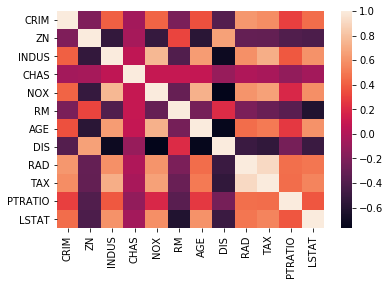

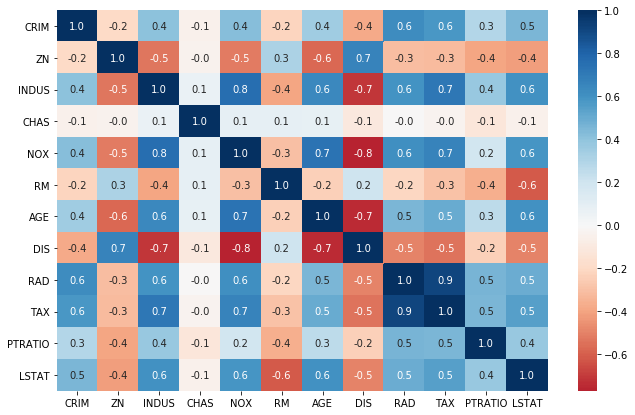

In [32]:
#PART-D: Making a correlation matrix
# We will drop MEDV because it's the target variable. We will drop CAT. MEDV because as per question 1, the table doesnt' show CAT. MEDV in the variable set. 
corr = df.drop(columns=['MEDV','CAT. MEDV']).corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [12]:
#PART-D(3)
#Building a bew dataframe after removing the variables - NOX, TAX, DIST 
df1 = pd.read_csv('BostonHousing.csv')

In [13]:
df1.isnull().values.any()

False

In [14]:
predictors = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 
               'RAD', 'PTRATIO', 'LSTAT']
outcome = 'MEDV'

In [33]:
train_X1, valid_X1, train_Y1, valid_Y1 = train_test_split(X1, Y1, test_size=0.4, random_state=1)
train_X1


,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
452,5.09017,0.0,18.10,0,6.297,91.8,24,20.2,17.27
346,0.06162,0.0,4.39,0,5.898,52.3,3,18.8,12.67
295,0.12932,0.0,13.92,0,6.678,31.1,4,16.0,6.27
88,0.05660,0.0,3.41,0,7.007,86.3,2,17.8,5.50
322,0.35114,0.0,7.38,0,6.041,49.9,5,19.6,7.70
...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0,5.876,19.1,1,16.4,9.25
72,0.09164,0.0,10.81,0,6.065,7.8,4,19.2,5.52
396,5.87205,0.0,18.10,0,6.405,96.0,24,20.2,19.37
235,0.33045,0.0,6.20,0,6.086,61.5,8,17.4,10.88


In [34]:
valid_X1

,CRIM,ZN,INDUS,CHAS,RM,AGE,RAD,PTRATIO,LSTAT
307,0.04932,33.0,2.18,0,6.849,70.3,7,18.4,7.53
343,0.02543,55.0,3.78,0,6.696,56.4,5,17.6,7.18
47,0.22927,0.0,6.91,0,6.030,85.5,3,17.9,18.80
67,0.05789,12.5,6.07,0,5.878,21.4,4,18.9,8.10
362,3.67822,0.0,18.10,0,5.362,96.2,24,20.2,10.19
...,...,...,...,...,...,...,...,...,...
186,0.05602,0.0,2.46,0,7.831,53.6,3,17.8,4.45
372,8.26725,0.0,18.10,1,5.875,89.6,24,20.2,8.88
442,5.66637,0.0,18.10,0,6.219,100.0,24,20.2,16.59
412,18.81100,0.0,18.10,0,4.628,100.0,24,20.2,34.37


In [35]:
train_Y1

452    16.1
346    17.2
295    28.6
88     23.6
322    20.4
       ... 
255    20.9
72     22.8
396    12.5
235    24.0
37     21.0
Name: MEDV, Length: 303, dtype: float64

In [36]:
valid_Y1.describe()

count    203.000000
mean      23.160099
std        9.526796
min        6.300000
25%       17.650000
50%       21.900000
75%       25.200000
max       50.000000
Name: MEDV, dtype: float64

In [37]:
#fit regression model
df1_lm = LinearRegression()
df1_lm.fit(train_X1, train_Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
# print coefficients
print('intercept ', df1_lm.intercept_)
print(pd.DataFrame({'Predictor': X1.columns, 'coefficient': df1_lm.coef_}))

# print performance measures
regressionSummary(train_Y1, df1_lm.predict(train_X1))

intercept  18.65665692636015
  Predictor  coefficient
0      CRIM    -0.078354
1        ZN     0.015987
2     INDUS    -0.066447
3      CHAS     2.758664
4        RM     3.910473
5       AGE     0.014926
6       RAD     0.060668
7   PTRATIO    -0.794351
8     LSTAT    -0.556832

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8794
            Mean Absolute Error (MAE) : 3.3643
          Mean Percentage Error (MPE) : -3.9073
Mean Absolute Percentage Error (MAPE) : 17.8455


Variables: CRIM, ZN, INDUS, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1837.69, add None
['LSTAT', 'RM', 'PTRATIO', 'CHAS']

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8794
            Mean Absolute Error (MAE) : 3.3643
          Mean Percentage Error (MPE) : -3.9073
Mean Absolute Percentage Error (MAPE) : 17.8455


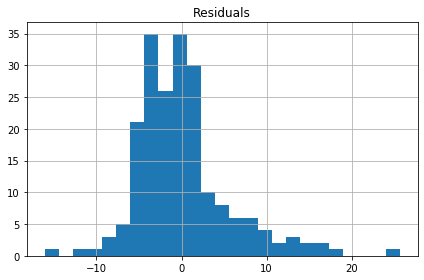

In [39]:
#Forward Selection Model
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X1[variables], train_Y1)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_Y1, [train_Y1.mean()] * len(train_Y1), model, df =1)
    return AIC_score(train_Y1, model.predict(train_X1[variables]), model)

best_model, best_variables = forward_selection(train_X1.columns, train_model, score_model, verbose=True)

print(best_variables)
#Regression Summary Statistcs
regressionSummary(train_Y1, df1_lm.predict(train_X1))

#determine residuals and create a histograM
df1_lm_pred = df1_lm.predict(valid_X1)
all_residuals = valid_Y1 - df1_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.savefig("myexample.png")


Variables: CRIM, ZN, INDUS, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=1842.40
Step: score=1841.30, remove AGE
Step: score=1839.73, remove ZN
Step: score=1838.93, remove INDUS
Step: score=1837.71, remove RAD
Step: score=1837.69, remove CRIM
Step: score=1837.69, remove None
['CHAS', 'RM', 'PTRATIO', 'LSTAT']

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8794
            Mean Absolute Error (MAE) : 3.3643
          Mean Percentage Error (MPE) : -3.9073
Mean Absolute Percentage Error (MAPE) : 17.8455


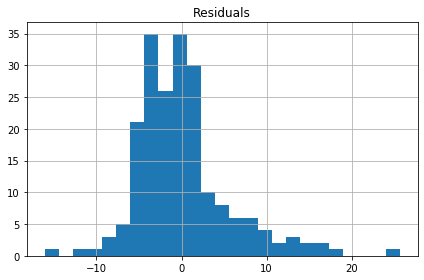

In [40]:
# Backward elimination
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X1[variables], train_Y1)
    return model

def score_model(model, variables):
    return AIC_score(train_Y1, model.predict(train_X1[variables]), model)

best_model, best_variables = backward_elimination(train_X1.columns, train_model, score_model, verbose=True)

print(best_variables)
#Regression Statistics for Backward Elimination
regressionSummary(train_Y1, df1_lm.predict(train_X1))

#determine residuals and create a histograM
df1_lm_pred = df1_lm.predict(valid_X1)
all_residuals = valid_Y1 - df1_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.savefig("myexample.png")

Variables: CRIM, ZN, INDUS, CHAS, RM, AGE, RAD, PTRATIO, LSTAT
Start: score=2191.75, constant
Step: score=1934.91, add LSTAT
Step: score=1874.18, add RM
Step: score=1842.54, add PTRATIO
Step: score=1837.69, add CHAS
Step: score=1837.69, unchanged None
['LSTAT', 'RM', 'PTRATIO', 'CHAS']

Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 4.8794
            Mean Absolute Error (MAE) : 3.3643
          Mean Percentage Error (MPE) : -3.9073
Mean Absolute Percentage Error (MAPE) : 17.8455


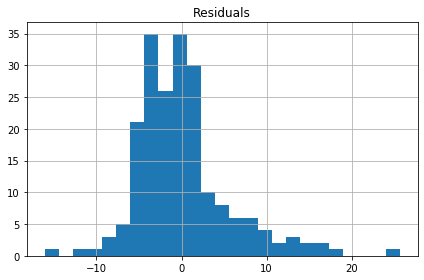

In [41]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X1[variables], train_Y1)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_Y1, [train_Y1.mean()] * len(train_Y1), model, df =1)
    return AIC_score(train_Y1, model.predict(train_X1[variables]), model)

best_model, best_variables = stepwise_selection(train_X1.columns, train_model, score_model, verbose=True)

print(best_variables)
#Regression Summary Statistcs
regressionSummary(train_Y1, df1_lm.predict(train_X1))

#determine residuals and create a histograM
df1_lm_pred = df1_lm.predict(valid_X1)
all_residuals = valid_Y1 - df1_lm_pred
ax = pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.tight_layout()
plt.savefig("myexample.png")
